In [1]:
#Preprocess your Titanic training data

import pandas as pd
from sklearn import preprocessing

# Load dataset
df = pd.read_csv('train.csv')

# Drop unnecessary columns
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

print(df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


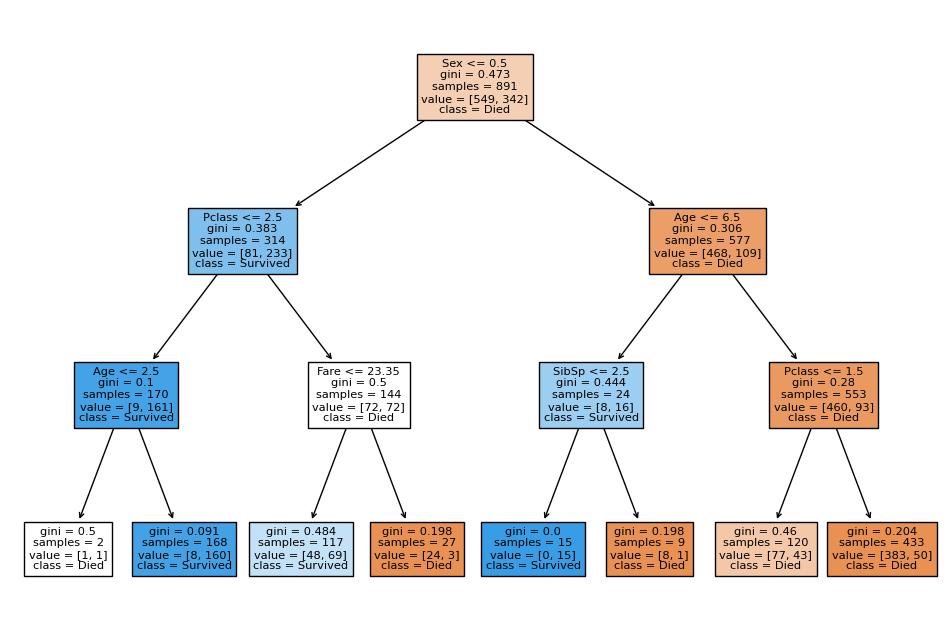

In [3]:
# Learn and fine-tune a decision tree model with the Titanic training data, plot
your decision tree;
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Separating features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Training a decision tree model
clf = DecisionTreeClassifier(max_depth=3)  # You can fine-tune this parameter and others
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Died', 'Survived'])
plt.show()


In [4]:
#Apply the five-fold cross validation of your fine-tuned decision tree learning
#model to the Titanic training data to extract average classification accuracy

from sklearn.model_selection import cross_val_score

# Calculate 5-fold cross-validation accuracy
scores = cross_val_score(clf, X, y, cv=5)
avg_score = scores.mean()
print(f"Average classification accuracy: {avg_score}")


Average classification accuracy: 0.7790032013056305


In [5]:
#Apply the five-fold cross validation of your fine-tuned random forest learning
#model to the Titanic training data to extract average classification accuracy

from sklearn.ensemble import RandomForestClassifier

# Train random forest model
rf = RandomForestClassifier(n_estimators=100)  # Fine-tune parameters as necessary
rf_scores = cross_val_score(rf, X, y, cv=5)
avg_rf_score = rf_scores.mean()
print(f"Average classification accuracy for Random Forest: {avg_rf_score}")


Average classification accuracy for Random Forest: 0.8003452388425083
